In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium1

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


# Importing Data 

In [2]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)
text = io.StringIO(resp.text)
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


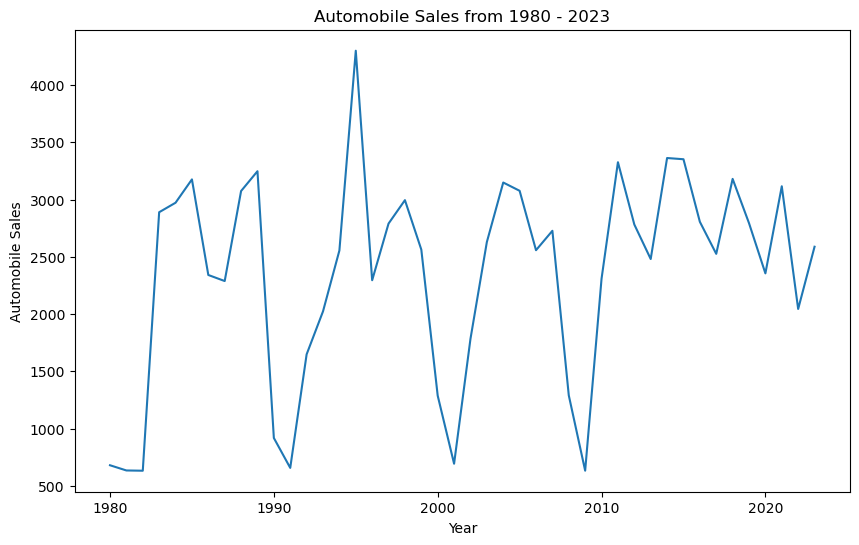

In [5]:
plt.figure(figsize=(10,6))
df_year_sales = df.groupby('Year')['Automobile_Sales'].mean()

df_year_sales.plot(kind='line',
        x= 'Year', y= 'Price')

plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales from 1980 - 2023')
plt.show()

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


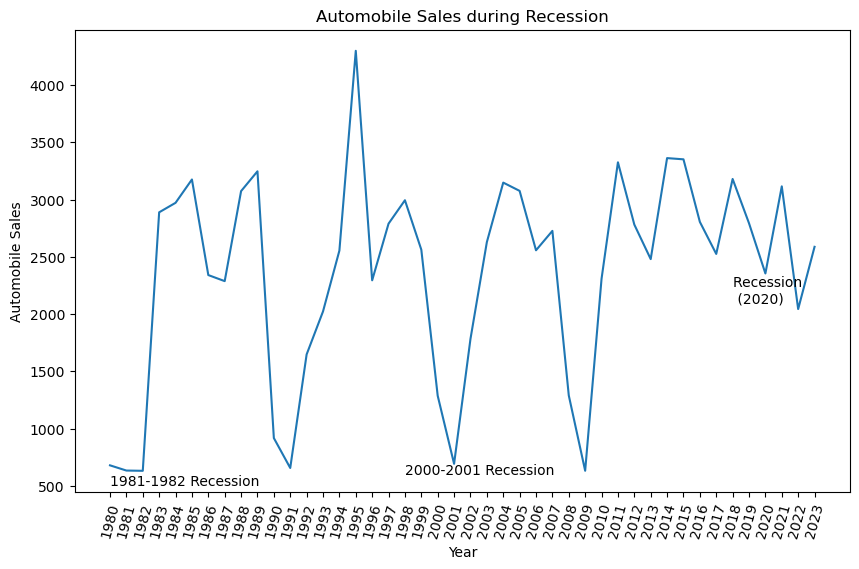

In [6]:
plt.figure(figsize=(10,6))
df_year_sales = df.groupby('Year')['Automobile_Sales'].mean()

df_year_sales.plot(kind='line',
        x= 'Year', y= 'Price')

plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(2018, 2100, 'Recession \n (2020)')
plt.text(1998, 600, '2000-2001 Recession')
plt.text(1980, 500, '1981-1982 Recession')
plt.show()


####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


In [8]:

df_rec = df[df['Recession']==1]
Vsales = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
Vsales.set_index('Year', inplace = True)


In [9]:
Vsales = Vsales.groupby(['Vehicle_Type'])['Automobile_Sales']
Vsales

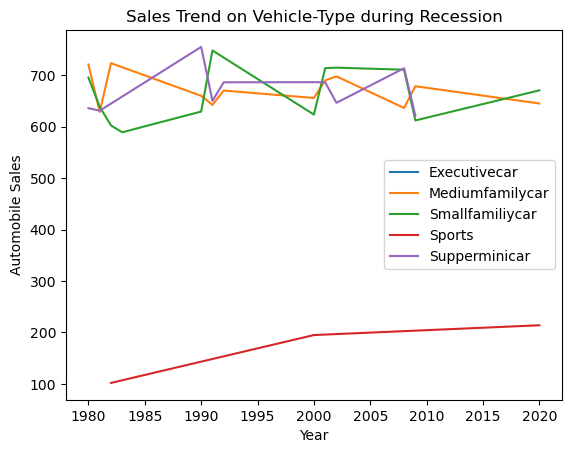

In [17]:
Vsales.plot(kind='line')


plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend on Vehicle-Type during Recession')
plt.legend()
plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


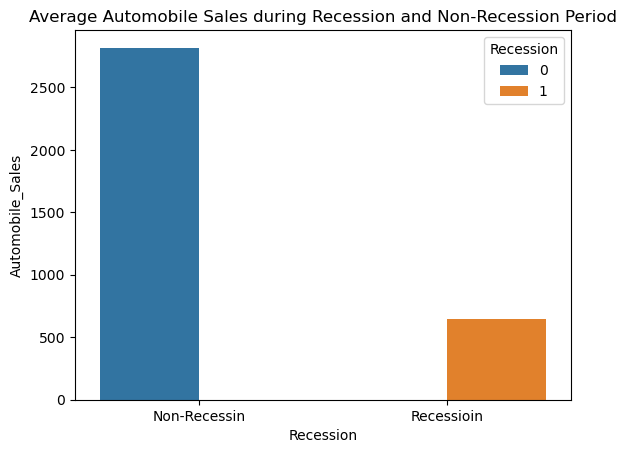

In [26]:
#df_rec = df[df['recession']==1]
#df_non_rec = df[df['recession']==0]

df_avgRS = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
sns.barplot(data = df_avgRS, x = 'Recession', y = 'Automobile_Sales', hue = 'Recession')

plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession Period')
plt.xticks(ticks=[0,1], labels = ['Non-Recessin', 'Recessioin'])
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


In [31]:
df_RV = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()


,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222


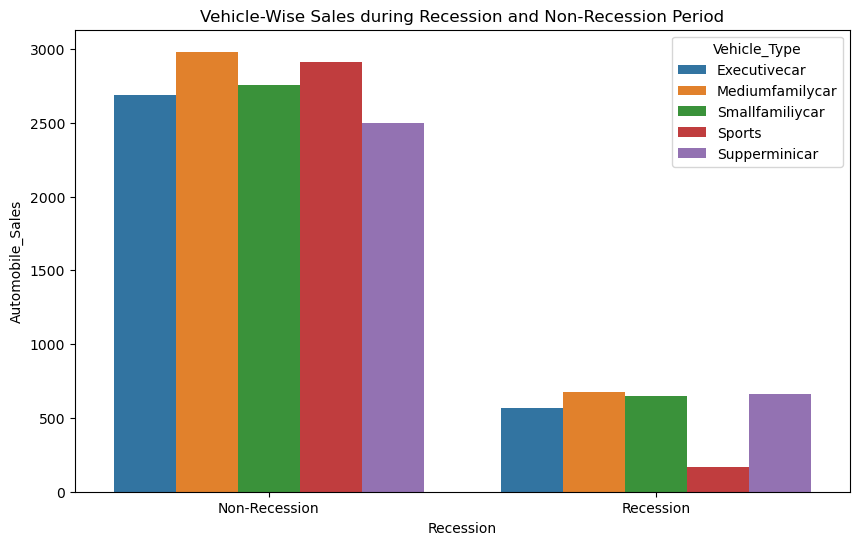

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(data = df_RV, x = 'Recession',
            y = 'Automobile_Sales', hue = 'Vehicle_Type')

plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

##### Inference
The bar chart above clearly shows that regardless of the vehicle_Type, there was a decline of automobile sales during recession.
This shows how deeply sales where affected during the time of recession. However, the most affected type of vehicle is the Executive car and sports

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


0      60.223
1      45.986
2      35.141
3      45.673
4      52.997
        ...  
523    57.169
524    59.315
525    19.472
526    27.904
527    13.518
Name: GDP, Length: 528, dtype: float64

In [63]:
df_rec = df[df['Recession']==1]
df_non_rec = df[df['Recession']==0]

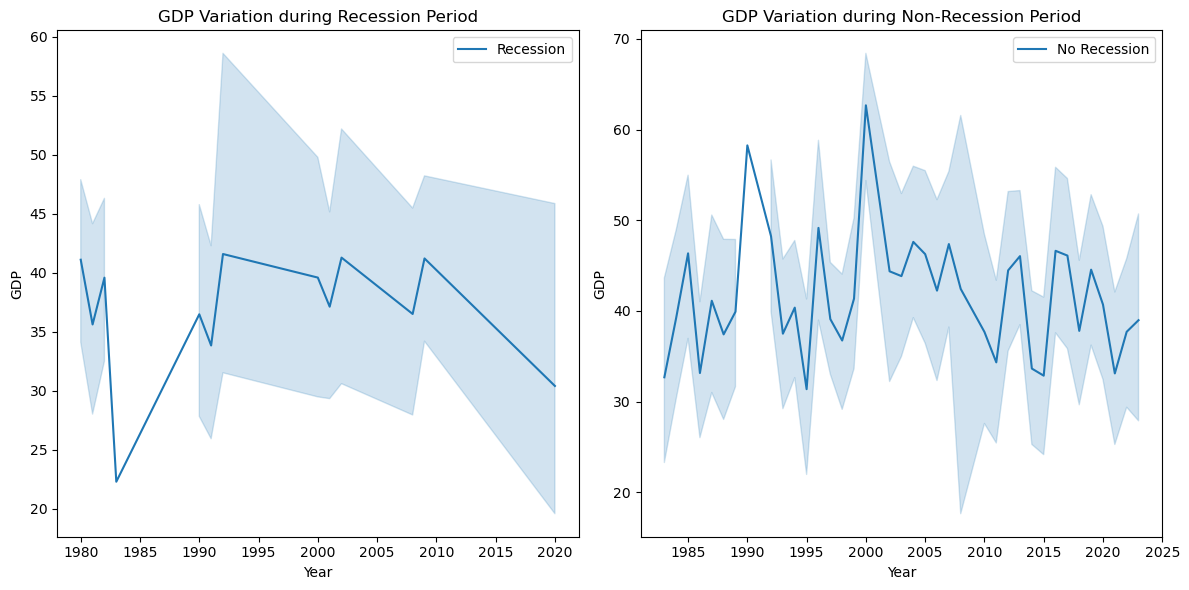

In [68]:
fig = plt.figure(figsize=(12,6))

# different axes for subplotting
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# first plot 
sns.lineplot(x = 'Year', y = 'GDP', data = df_rec, label = 'Recession', ax = ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Second plot
sns.lineplot(x = 'Year', y = 'GDP', data = df_non_rec, label = 'No Recession', ax = ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


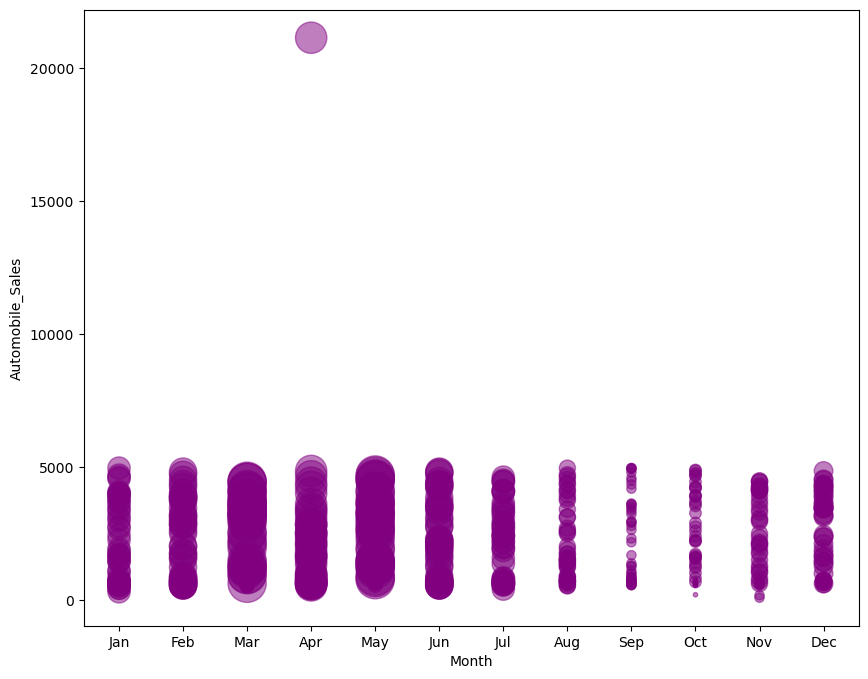

In [101]:
ax = df.plot(kind = 'scatter',
                    x = 'Month',
                    y = 'Automobile_Sales',
                    figsize = (10, 8),
                    alpha = 0.5, # transparency
                    color = 'purple',
                    s= df['Seasonality_Weight'] * 500 + 10, # pass in weights
                 
                   )

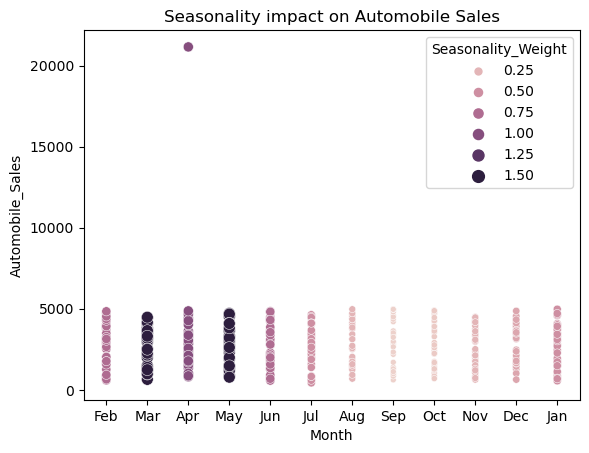

In [104]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month',
                y='Automobile_Sales', size=size,
                hue = 'Seasonality_Weight'
                legen
               )

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

##### Inference
From the above plot, it is evident that seasonality has not affected the overall sales. However, there is a drastic raise in sales in the month of April.

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


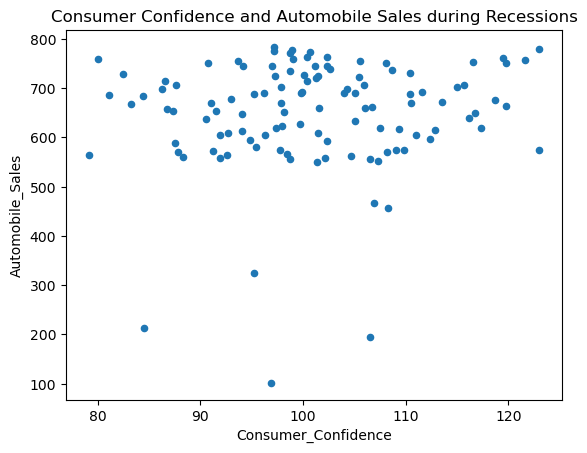

"\nrec_data = df[df['Recession'] == 1]\nplt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])\n"

In [117]:
df_rec = df[df['Recession']==1]
df_rec.plot(kind = 'scatter',
        x = 'Consumer_Confidence',
        y = 'Automobile_Sales'
       )
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

# or
'''
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
'''

 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

Text(0.5, 1.0, 'Relationship between Average Vehicle Price and Sales during Recessions')

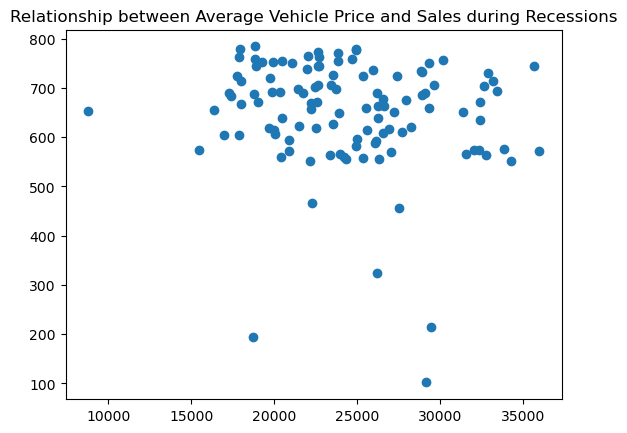

In [120]:
rec_data = df[df['Recession'] ==1]
plt.scatter(rec_data['Price'],
            rec_data['Automobile_Sales'])
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


In [121]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

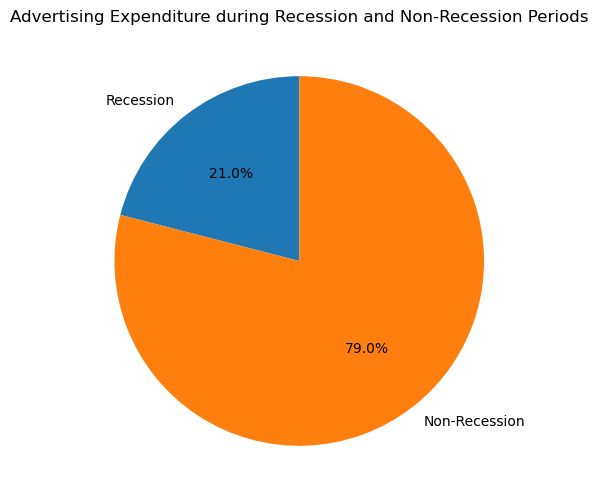

In [130]:
df_rec = df[df['Recession']==1]
df_non_rec = df[df['Recession']==0]

RAtotal = df_rec['Advertising_Expenditure'].sum()
NRAtotal = df_non_rec['Advertising_Expenditure'].sum()

plt.figure(figsize = (8,6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%',
        startangle =90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


Text(0.5, 1.0, 'Total Advertisement Expenditure for each Vehicle Type during recession period')

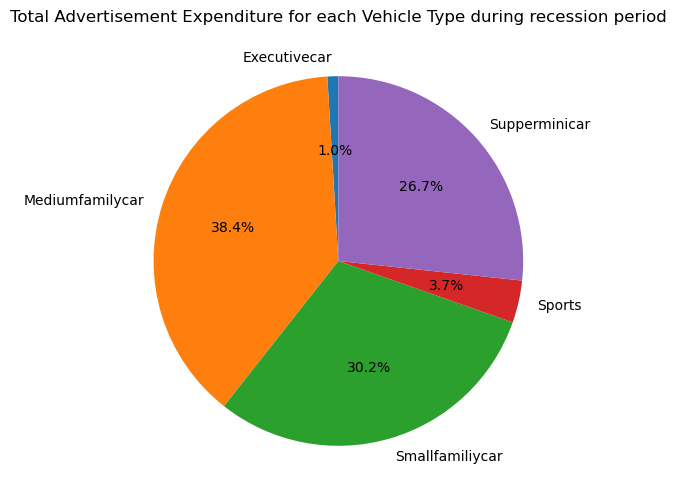

In [142]:
df_rec = df[df['Recession']==1]
df_V = df_rec.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(10,6))
labels = df_V.index
sizes = df_V.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)

plt.title('Total Advertisement Expenditure for each Vehicle Type during recession period')
                                     

 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


C:\Users\user\AppData\Local\Temp\ipykernel_28232\3816016867.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = df_rec, x= 'unemployment_rate',


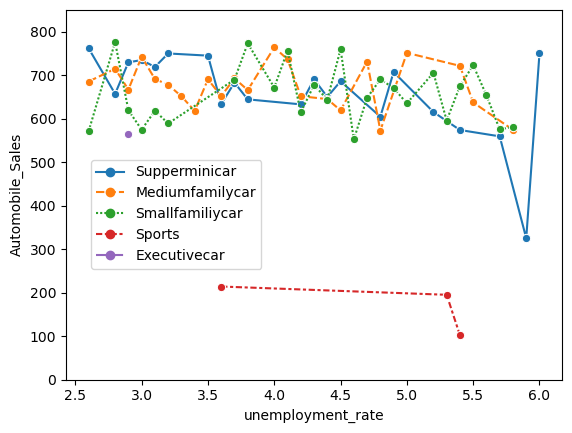

In [154]:
df_rec = df[df['Recession']==1]

sns.lineplot(data = df_rec, x= 'unemployment_rate',
            y = 'Automobile_Sales',
            hue = 'Vehicle_Type', style = 'Vehicle_Type',
            markers = 'o', err_style = None)

plt.ylim(0,850)
plt.legend(loc=(0.05, .3))

### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [158]:
import requests

def download(url, filename):
    # Fetch the file
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Write the content to a local file
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")

# Correct URL for the JSON file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

# Call the download function
download(url, "us-states.json")


In [160]:

# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1